Import important modules

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

Creating data

In [2]:
input_list = np.random.randint(0, 40000, (5000, 2))

output_list = input_list[:, 0] / input_list[:, 1]

# reshape the result array to a column vector
output_list = output_list.reshape(-1, 1)

Splitting data into training and testing

In [3]:
input_list_train, input_list_test, output_list_train, output_list_test = train_test_split(input_list, output_list, test_size=0.2)

Defining keras model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

Compiling the model

In [5]:
model.compile(optimizer='adam', loss='mean_squared_error')

Training the model

In [6]:
fitValues = model.fit(input_list, output_list, epochs=6, batch_size=4)

Epoch 1/6
1250/1250 [==============================] - 5s 2ms/step - loss: 435966.8125
Epoch 2/6
1250/1250 [==============================] - 3s 2ms/step - loss: 3975.1736
Epoch 3/6
1250/1250 [==============================] - 3s 2ms/step - loss: 4403.8794
Epoch 4/6
1250/1250 [==============================] - 3s 2ms/step - loss: 4681.0400
Epoch 5/6
1250/1250 [==============================] - 3s 2ms/step - loss: 5468.5718
Epoch 6/6
1250/1250 [==============================] - 3s 2ms/step - loss: 5695.9082


Create a plot from the training losses x epoch

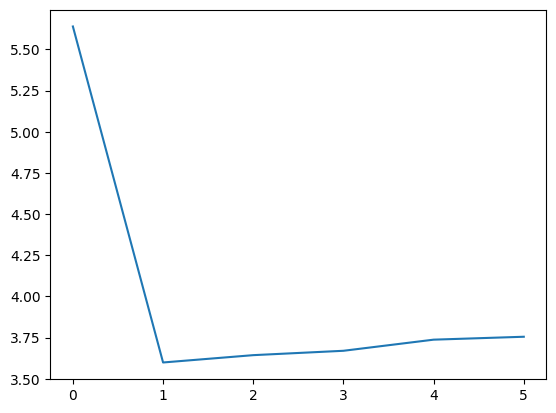

[435966.8125, 3975.173583984375, 4403.87939453125, 4681.0400390625, 5468.57177734375, 5695.908203125]


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

y = [math.log(i, 10) for i in list(fitValues.history["loss"])]
x = [i for i in range(len(list(y)))]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()
print(fitValues.history["loss"])

Making predictions with our new model

In [15]:
new_input = np.array([[80, 70], [50, 30], [90, 100]])
predictions = model.predict(new_input)
print("{:<10s}{:<15s}{}".format(" ", "prediction", "actual"))
for i in range(len(predictions)):
    x, y = new_input[i]
    predicted_val = predictions[i][0]
    actual_val = x / y
    print("{:<10s}{:<15s}{}".format(str(x) + "/" + str(y) + ":", str(predicted_val), str(actual_val)))

1/1 [==============================] - 0s 70ms/step
          prediction     actual
80/70:    0.0900013      1.1428571428571428
50/30:    0.21999045     1.6666666666666667
90/100:   0.14345093     0.9


Evaluating the Ultimate AI that we just made!!!!!

In [16]:
loss = model.evaluate(input_list_test, output_list_test)
score = 1 / (1 + loss)  # Convert the loss to a score
print("score:" + str(score))

32/32 [==============================] - 0s 772us/step - loss: 925.1250
score:0.001079767849912269


Check if this model is already exported, if not export it

In [8]:
import pickle
import os
import pathlib

oneUp = pathlib.Path(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
print("oneUp:", oneUp)

preModels = pathlib.Path(oneUp.joinpath('preTrainedModels'))
preModels.mkdir(parents=True, exist_ok=True) #If preModels dosent exist, create it
print("preModels:", preModels)

pkFile = oneUp.joinpath(preModels).joinpath("NN-Div.pkl")
pkFile = pathlib.Path(preModels.joinpath("NN-Div.pkl"))
print("pkFile", pkFile)

with pkFile.open('w+b') as f: # 'w' = write, '+' = create file if non existant, 'b' = write in binary
    pickle.dump(model, f)

oneUp: /home/martin/Desktop/simplePythonAI
preModels: /home/martin/Desktop/simplePythonAI/preTrainedModels
pkFile /home/martin/Desktop/simplePythonAI/preTrainedModels/NN-Div.pkl


In [9]:
with open(pkFile, "rb") as f:
    data = pickle.load(f)
    print("data type"+str(type(data)))
    numbers = np.array([[15, 15]])
    prediction = data.predict(numbers)
    print(prediction)

data type<class 'keras.engine.sequential.Sequential'>
1/1 [==============================] - 0s 62ms/step
[[0.24775293]]
